In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path='C:/Users/91994/Desktop/Deep Learning/CNN/Brain Tumour Prediction/brain_tumour_dataset'

In [3]:
categories=os.listdir(data_path)
categories

['no', 'yes']

In [4]:
labels=np.array([0,1])

In [5]:
labels_dict=dict(zip(categories,labels))

In [6]:
labels_dict

{'no': 0, 'yes': 1}

In [7]:
img_size=100
data = []
target = []
for category in categories:
    folder_path = os.path.join(data_path, category)
    image_names=os.listdir(folder_path)
    for img_name in image_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # gray image conversion
            resized = cv2.resize(gray_img,(img_size,img_size)) # resize every image to uniform size
            data.append(resized)
            target.append(labels_dict[category])
        except Exception as e:
            print("Exception",e)     

no
no
no
no


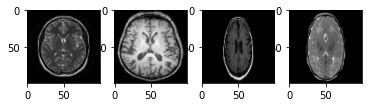

In [8]:
plt.figure()
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(data[i],cmap='gray')
    print(categories[target[i]])
plt.show()

In [9]:
data = np.array(data)/255 # Scaling
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)

In [10]:
data.shape

(253, 100, 100, 1)

In [11]:
target.shape

(253,)

In [12]:
from keras.utils import np_utils
new_target = np_utils.to_categorical(target)

In [13]:
np.save('data',data)
np.save('target',new_target)